## Introduction

League of Legends is a multiplayer online battle arena video game. Players form a team of five and assume the role of a champion, characters with unique abilities, generally varying around a type of class, and battle against a team of player- or computer-controlled champions. The two teams compete to be the first to destroy the Nexus structure within the opposing base.

## Data

I use 10-minutes of data collected from over nine-thousand unique games to conduct this project. The games are all ranked games at high elo (Diamond 1 to Masters).

This dataset contains 40 columns. The target column is called "blueWins". The blue team wins the game if "blueWins" is 1, otherwise the red team wins. Other columns include important features such as "blueWardsDestroyed", "redWardsPlaced", "blueAvgLevel" etc.

## Purpose

The purpose of this project is to determine whether a team can win the game by building an accurate machine learning model based on the first 10 minutes data of the game. From this perspective, we can understand better how gaming in first 10 minutes influences the result.

## Analysis 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/wowam/Desktop/projects/leagueoflegends/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

There are 40 columns in total and some of them are repeated. For example, when the blue team got first blood, the red team would never got it. So we choose to remove them and some unnecessary data.

In [6]:
df=df.drop(columns=["gameId", "blueTotalJungleMinionsKilled", "blueGoldDiff", "blueExperienceDiff", "blueGoldPerMin",
                 "blueCSPerMin", "redFirstBlood", "redKills", "redDeaths", "redTotalJungleMinionsKilled","redGoldDiff",
                "redExperienceDiff", "redCSPerMin", "redGoldPerMin"], axis=1)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,8,0,0,0,0,16567,6.8,17047,197
1,0,12,1,0,5,5,5,0,0,0,...,1,2,2,1,1,1,17620,6.8,17438,240
2,0,15,0,0,7,11,4,1,1,0,...,3,14,0,0,0,0,17285,6.8,17254,203
3,0,43,1,0,4,5,5,1,0,1,...,2,10,0,0,0,0,16478,7.0,17961,235
4,0,75,4,0,6,6,6,0,0,0,...,2,7,1,1,0,0,17404,7.0,18313,225


Among all features, I filter and take only the subset of the relevant features by using Pearson correlation.
Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable blueWins. We will only select features which has correlation of above 0.2 absolute value with the output variable.

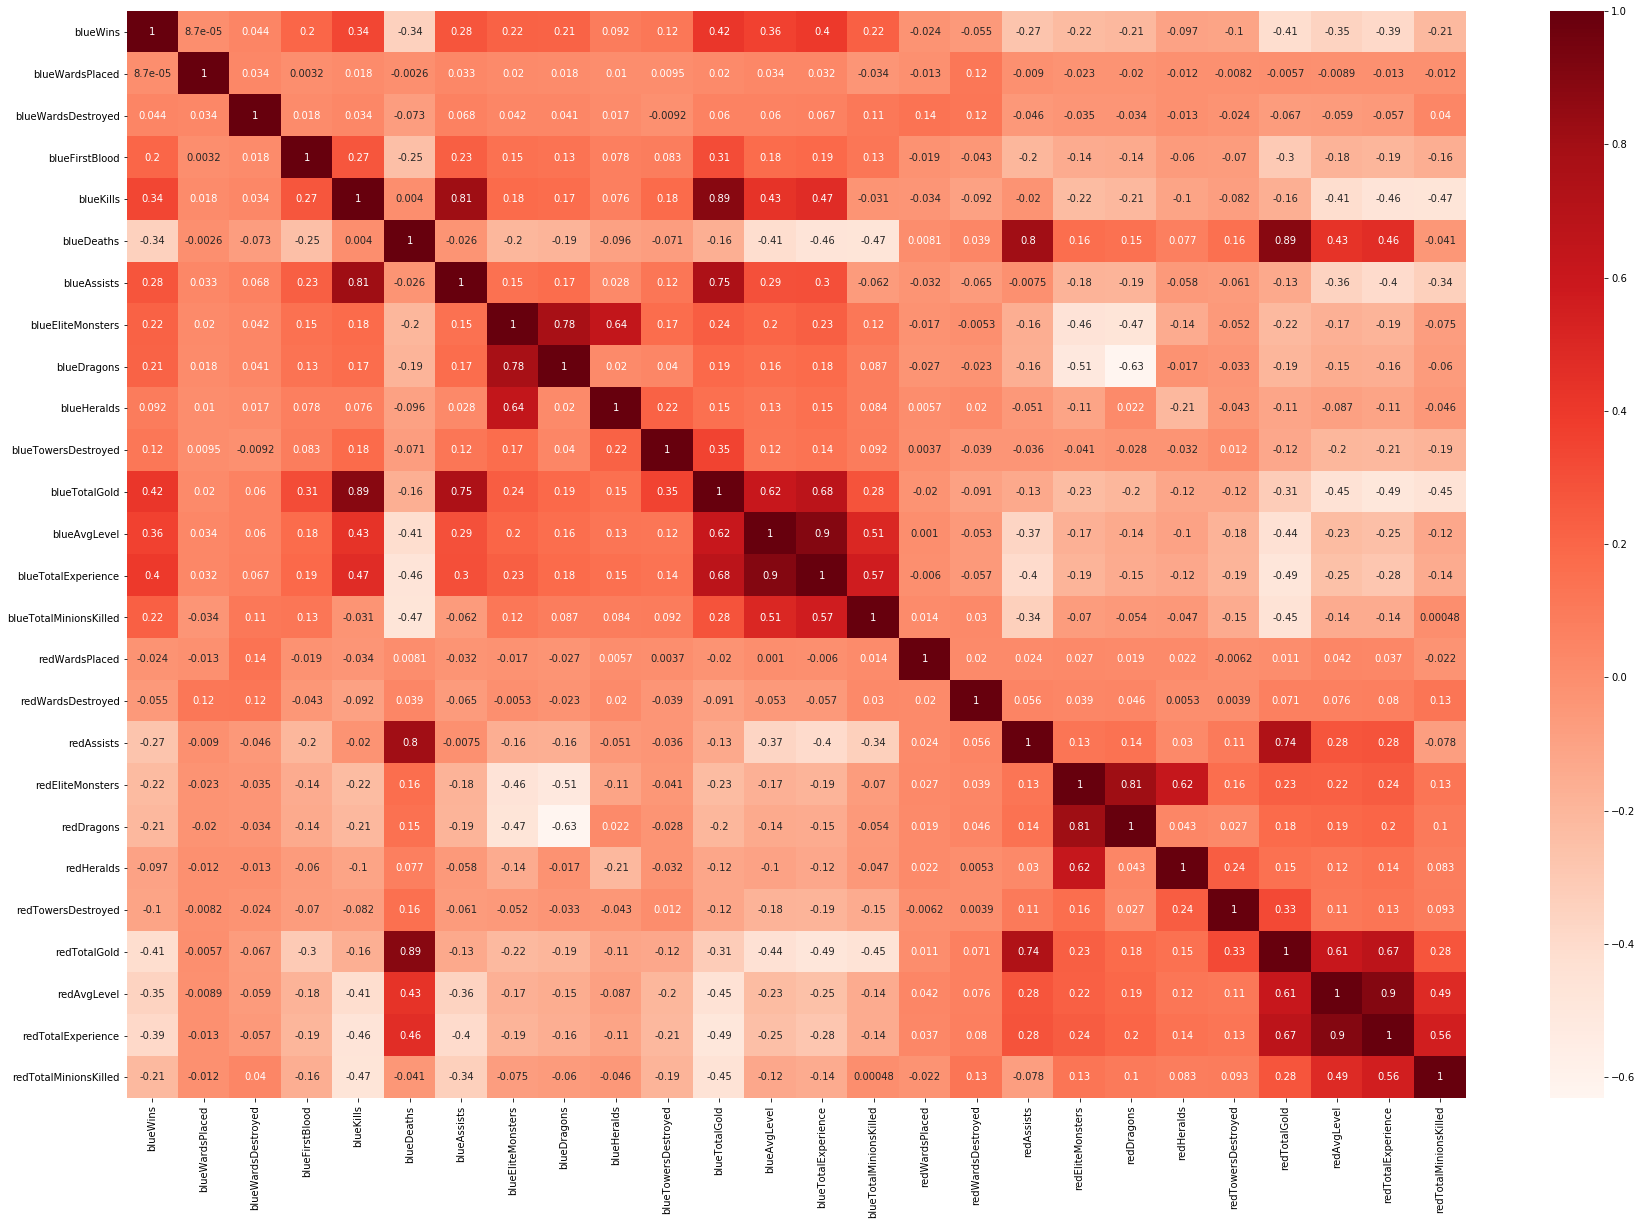

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#Correlation with output variable
cor_target = abs(df.corr()["blueWins"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

blueWins                  1.000000
blueFirstBlood            0.201769
blueKills                 0.337358
blueDeaths                0.339297
blueAssists               0.276685
blueEliteMonsters         0.221944
blueDragons               0.213768
blueTotalGold             0.417213
blueAvgLevel              0.357820
blueTotalExperience       0.396141
blueTotalMinionsKilled    0.224909
redAssists                0.271047
redEliteMonsters          0.221551
redDragons                0.209516
redTotalGold              0.411396
redAvgLevel               0.352127
redTotalExperience        0.387588
redTotalMinionsKilled     0.212171
Name: blueWins, dtype: float64

Hence we will drop all other features apart from these. However one of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other (correlation coefficient < 0.7).So let us check the correlation of selected features with each other.

In [9]:
#"blueKills", "blueAssists", "blueDragons", "blueAvgLevel""blueDeaths","redAssists", "redDragons", "redAvgLevel"
col = ["blueWins", "blueFirstBlood", "blueEliteMonsters", "blueTotalGold", "blueTotalExperience", 
      "blueTotalMinionsKilled", "redEliteMonsters", "redTotalGold", "redTotalExperience", "redTotalMinionsKilled"]
df_clean = pd.DataFrame(df, columns = col)
df_clean

,blueWins,blueFirstBlood,blueEliteMonsters,blueTotalGold,blueTotalExperience,blueTotalMinionsKilled,redEliteMonsters,redTotalGold,redTotalExperience,redTotalMinionsKilled
0,0,1,0,17210,17039,195,0,16567,17047,197
1,0,0,0,14712,16265,174,2,17620,17438,240
2,0,0,1,16113,16221,186,0,17285,17254,203
3,0,0,1,15157,17954,201,0,16478,17961,235
4,0,0,0,16400,18543,210,1,17404,18313,225
...,...,...,...,...,...,...,...,...,...,...
9874,1,1,1,17765,18967,211,0,15246,16498,229
9875,1,0,1,16238,19255,233,0,15456,18367,206
9876,0,0,0,15903,18032,210,1,18319,19909,261
9877,0,1,1,14459,17229,224,0,15298,18314,247


Split the dataset into train/test sets.

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df_clean.drop("blueWins", axis=1)
y = df_clean["blueWins"]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)

pred_log = lm.predict(X_test)
acc_log = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.729757085020243


### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)

0.7343117408906883


### K-Nearest Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

#search for best parameters
grid = {"n_neighbors":np.arange(1,100)}
knn = GridSearchCV(knn, grid, cv=5)
knn.fit(X_train,y_train) 

pred_knn = knn.predict(X_test) 
acc_knn = accuracy_score(pred_knn, y_test)
print(acc_knn)

0.7186234817813765


### Decision Tree

In [44]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf = clf.fit(X_train, y_train)

pred_tree = clf.predict(X_test)
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.7135627530364372


[Text(167.4, 195.696, 'X[2] <= 0.427\nentropy = 1.0\nsamples = 7903\nvalue = [3966, 3937]'),
 Text(83.7, 152.208, 'X[6] <= 0.417\nentropy = 0.886\nsamples = 3690\nvalue = [2569, 1121]'),
 Text(41.85, 108.72, 'X[6] <= 0.311\nentropy = 0.999\nsamples = 1085\nvalue = [526, 559]'),
 Text(20.925, 65.232, 'X[7] <= 0.644\nentropy = 0.875\nsamples = 200\nvalue = [59, 141]'),
 Text(10.4625, 21.744, 'entropy = 0.836\nsamples = 184\nvalue = [49, 135]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.954\nsamples = 16\nvalue = [10, 6]'),
 Text(62.775000000000006, 65.232, 'X[2] <= 0.314\nentropy = 0.998\nsamples = 885\nvalue = [467, 418]'),
 Text(52.3125, 21.744, 'entropy = 0.854\nsamples = 183\nvalue = [132, 51]'),
 Text(73.2375, 21.744, 'entropy = 0.999\nsamples = 702\nvalue = [335, 367]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 0.58\nentropy = 0.752\nsamples = 2605\nvalue = [2043, 562]'),
 Text(104.625, 65.232, 'X[2] <= 0.306\nentropy = 0.848\nsamples = 1732\nvalue = [1256, 476]'),
 Text(94.

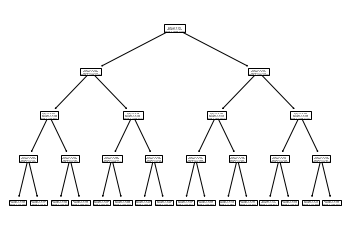

In [37]:
#sklearn.tree.plot_tree
tree.plot_tree(clf)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.7191295546558705


### Support Vector Machine

In [56]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(pred_svm, y_test)
print(acc_svm)

0.7302631578947368


## Result

In [64]:
Accuracy = [acc_lm, acc_nb, acc_knn, acc_tree, acc_rf, acc_svm]
d = {'Algorithm': ['Logistic Regression','Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'SVM'], 
     'Accuracy Score': Accuracy}
report = pd.DataFrame(d)
report

,Algorithm,Accuracy Score
0,Logistic Regression,0.729757
1,Naive Bayes,0.734312
2,KNN,0.718623
3,Decision Tree,0.713563
4,Random Forest,0.719130
5,SVM,0.730263


From the accuracy score, we can see that Naive Bayesv gives the best prediction. Next let's take a closer look at the confusion matrix of this method.

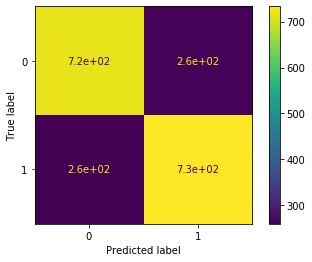

In [66]:
from sklearn.metrics import plot_confusion_matrix
model = nb.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)
plt.show()

## Conclusion

Naive Bayes Model gives us the best prediction of 73% accuracy. Thus, if we analyze teams data(first blood, gold earned, experience earned, etc.) in first 10 minutes, we could probably know whether they win this game. However, there is still a chance that teams lose the game when they have a big advantage in the first 10 minutes.